<a href="https://colab.research.google.com/github/bgohrani/PyTorch_Intro/blob/main/PyTorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#PyTorch

Here we'll be using a standard machine learning library known as PyTorch, that simplifies a lot of existing code we have written earlier. Now that we have understood the intuition behind forward pass, backpropagation, optimization and so on, we can avoid writing huge classes and abstracting out certain sections of our code by taking advantage of built in functions and methods commonly used in DL. We will do this step by step, running several models on the same dataset.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score , mean_squared_error
import matplotlib.colors
import math
from sklearn.datasets import make_blobs
from sklearn.compose import ColumnTransformer
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch import optim
import time
sns.set()


#We import our usual libraries
#Additional libraries:
#torch for storing data in the form of tensors, faster to operate upon
#torch.functional, here we use the built in loss_function
#torch.nn to use modules for initializing data in an easy manner 
#optim to use the built-in optimizer rather than writing code for incrementing

In [ ]:
x = torch.zeros(3,2)
y = torch.rand(3,2)
x_np = x.numpy()
x_np.shape

(3, 2)

In [ ]:
print(torch.cuda.device_count())
cuda0 = torch.device('cuda:0')
torch.cuda.device(0)

#cuda device count helps us find the number of GPUs available, in colab it is 2
#We store this GPU data in a variable called cuda0, we can refer to it while initialising values to be stored in GPU
#Third line helps us find the location of the GPU

1


In [ ]:
x = torch.ones([3,2], requires_grad=True)
print(x)
y = x + 5
print(y)
z = 1/(1 + torch.exp(-y))
print(z)
final = torch.sum(z)
print(final)
final.backward()
x.grad

#We are using the autograd function here, making 2 layers of a forward pass and evaluating gradients 
#We take our output from the pass and use .backward(), to find gradients
#We can then refer to gradients of any layer simply by calling .grad

tensor([[1., 1.],
        [1., 1.],
        [1., 1.]], requires_grad=True)
tensor([[6., 6.],
        [6., 6.],
        [6., 6.]], grad_fn=<AddBackward0>)
tensor([[0.9975, 0.9975],
        [0.9975, 0.9975],
        [0.9975, 0.9975]], grad_fn=<MulBackward0>)
tensor(5.9852, grad_fn=<SumBackward0>)


tensor([[0.0025, 0.0025],
        [0.0025, 0.0025],
        [0.0025, 0.0025]])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  if __name__ == '__main__':



CPU times: user 157 ms, sys: 4.18 ms, total: 161 ms
Wall time: 180 ms


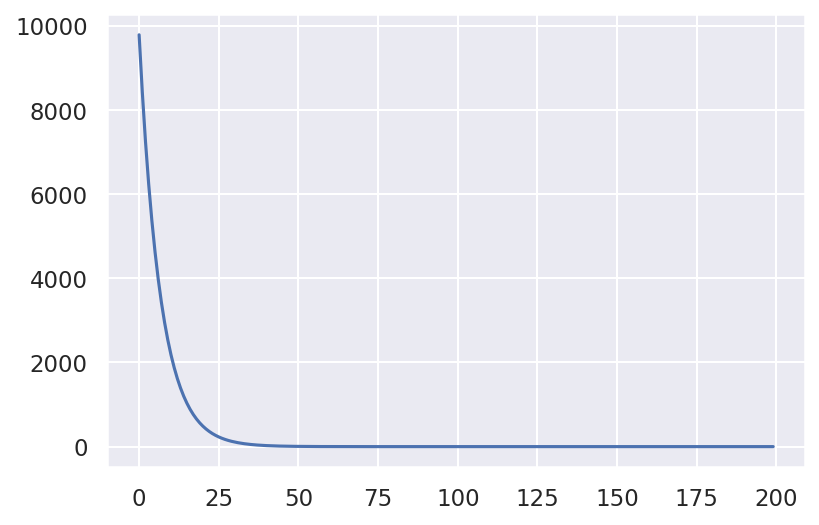

In [ ]:
%%time
N = 1000
epochs =200000
loss_training = []

x = torch.rand([N], requires_grad=True) 
weight = torch.rand([N],requires_grad=True)
y = torch.dot(x,weight) + 100

w = torch.rand([N],requires_grad=True)
b = torch.tensor([1.0],requires_grad=True)

for i in tqdm_notebook(range(200)):
  y_pred = torch.dot(w,x) + b
  loss = torch.sum((y_pred - y)**2)
  loss_training.append(loss.item())
  loss.backward(retain_graph=True)
  with torch.no_grad():
    w -= 0.0001*w.grad
    b -= 0.0001*b.grad
    w.grad.zero_()
    b.grad.zero_()

plt.figure(dpi=150)
plt.plot(loss_training)
plt.show


#We have tried to run a simple model here similar to classes we have written before
#We first generate x and y for training and then initialise random weights and get them to fit
#In the loop we do a forward pass, find y_pred, compute loss, do backward for the loss, and get w.grad, b.grad
#Then setting no_grad, to keep the further computations out of the forward pass, we update the weights and then reset the gradients
#Loss at each step is stored in a list and then the list is plotted as usual 
#To use autograd, each initialisation is done with requires_grad = True

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  import sys



CPU times: user 142 ms, sys: 13.6 ms, total: 155 ms
Wall time: 191 ms


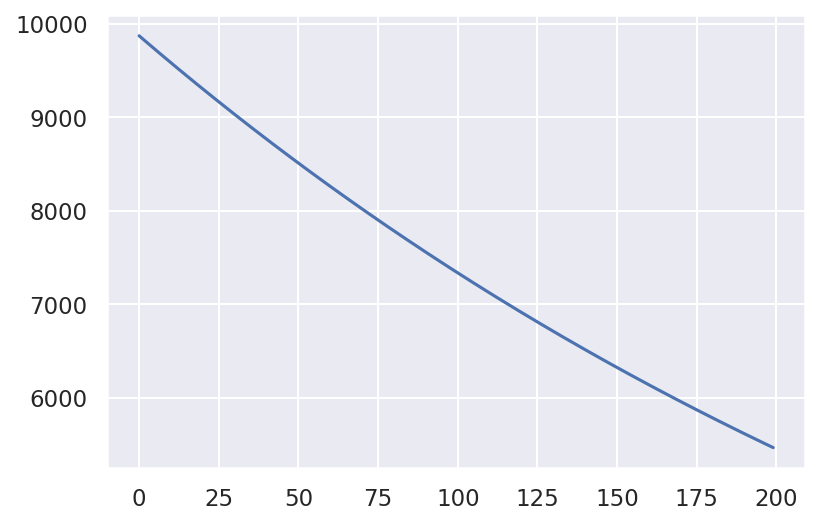

In [ ]:
%%time
loss_training = []
x = torch.rand([20,1], requires_grad=True)
weight = torch.rand([1,20],requires_grad=True)
y = torch.matmul(weight,x) + 100
w = torch.rand([1,20],requires_grad=True)
b = torch.tensor([1.0],requires_grad=True)
for i in tqdm_notebook(range(200)):
  y_pred = torch.matmul(w,x) + b
  loss = torch.sum((y_pred - y)**2)
  loss_training.append(loss.item())
  loss.backward(retain_graph=True)
  with torch.no_grad():
    w -= 0.0001*w.grad
    b -= 0.0001*b.grad
    w.grad.zero_()
    b.grad.zero_()

plt.figure(dpi=150)
plt.plot(loss_training)
plt.show

#Same thing, different parameters

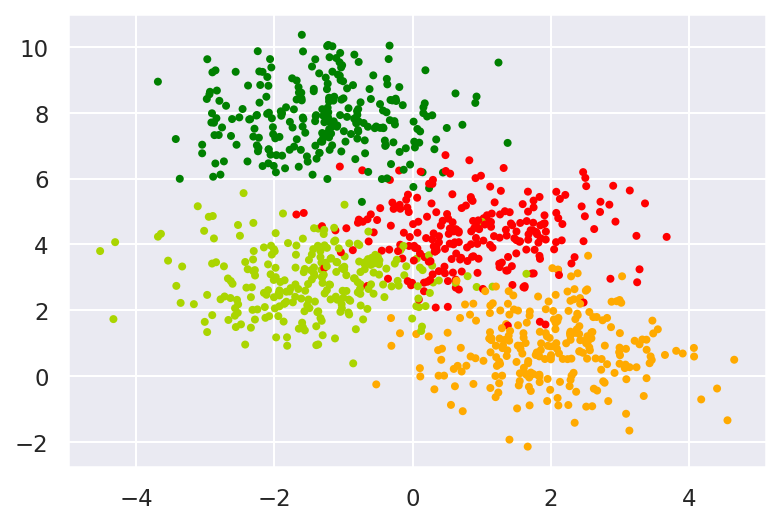

In [ ]:
cmap1 = matplotlib.colors.LinearSegmentedColormap.from_list("", ["red","yellow","green"])
data,labels = make_blobs(n_samples=1000, n_features=2,centers=4, random_state=0)
plt.figure(dpi=150)
plt.scatter(data[:,0],data[:,1],c=labels, cmap= cmap1,s=8)
plt.show()

#Generating data for training, and plotting as usual

In [ ]:
X_train1, X_test1, Y_train1, Y_test1 = train_test_split(data,labels, stratify=labels, random_state=0)
print(X_train1.shape, Y_train1.shape, X_test1.shape, Y_test1.shape)

X_train = torch.from_numpy(X_train1)
X_test = torch.from_numpy(X_test1)
Y_train = torch.from_numpy(Y_train1)
Y_test = torch.from_numpy(Y_test1)

#Splitting for training and testing
#Conversion of all data into tensors

(750, 2) (750,) (250, 2) (250,)


In [ ]:
def model(x):
  a1 = torch.matmul(weight1,x.T) + bias1
  h1 = a1.sigmoid()
  a2 = torch.matmul(weight2,h1) + bias2
  h2 = torch.exp(a2)/torch.sum(torch.exp(a2),axis= 0)
  return h2

def loss_func(y_hat,y):
  return -(y_hat[y,range(y.shape[0])].log()).mean()

def accuracy_find(y_hat,y):
  return (torch.argmax(y_hat,axis=0) == y).float().mean().item()


#We define 3 functions here, one model which is like our forward pass, for the network 2 -> 2 -> 4
#Our loss function takes the cross entropy loss by taking the y indice and then the negative log of it 
#Our accuracy just sees which all values match and take the mean of those 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


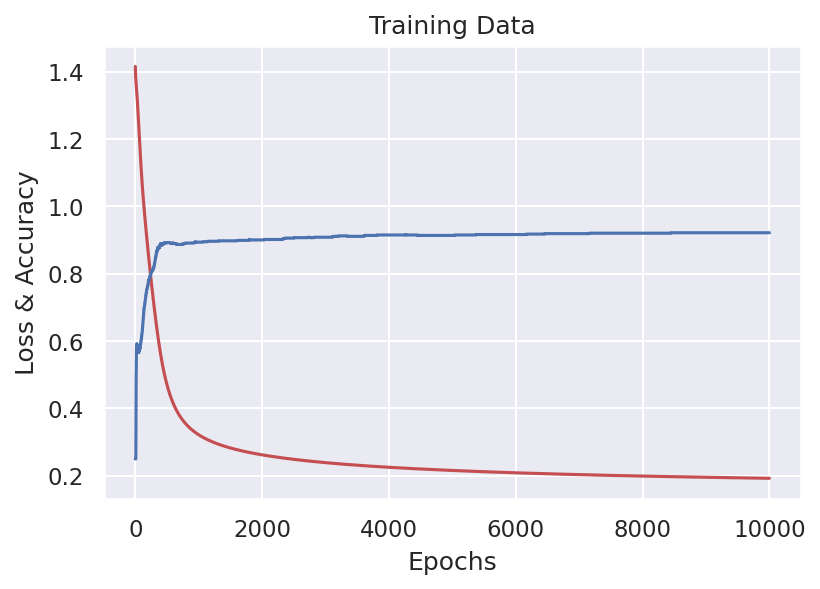

Accuracy: 0.9213333129882812
Loss: 0.19197414815425873


In [ ]:
torch.manual_seed(0)
weight1 = torch.rand([2,2],requires_grad=True)
weight2 = torch.rand([4,2],requires_grad=True)
bias1 = torch.zeros([2,1],requires_grad=True)
bias2 = torch.zeros([4,1],requires_grad=True)

epochs = 10000
lr = 0.2
loss_count = []
accuracy_count = []


for i in tqdm_notebook(range(epochs)):
  y_hat = model(X_train.float())
  loss_train = loss_func(y_hat,Y_train)
  loss_train.backward()
  loss_count.append(loss_train)
  accuracy_count.append(accuracy_find(y_hat,Y_train))

  with torch.no_grad():
    weight1 -= lr*(weight1.grad)
    weight2 -= lr*(weight2.grad)
    bias1 -= lr*(bias1.grad)
    bias2 -= lr*(bias2.grad)
    weight1.grad.zero_()
    weight2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()

plt.figure(dpi=150)
plt.plot(loss_count,'r')
plt.plot(accuracy_count,'b')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.title('Training Data')
plt.show()
print('Accuracy:', accuracy_count[epochs-1])
print('Loss:', loss_count[epochs-1].item())

#We use these 3 functions here, we initialize weights and biases, epochs, lr
#We then run a loop across epochs, doing forward pass, backward and then taking no_grad, update our parameters
#We then plot the loss and accuracy lists we have been maintaining as before 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  del sys.path[0]


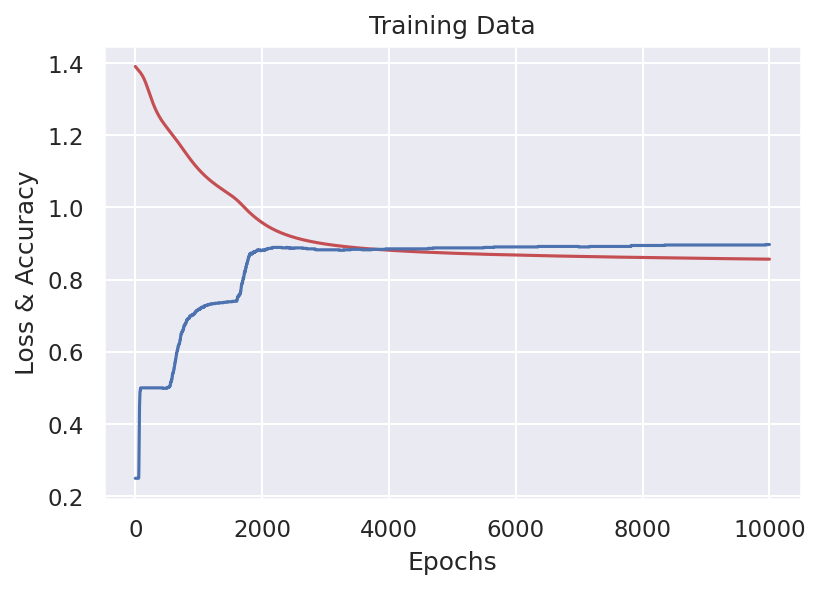

Accuracy: 0.8973333239555359
Loss: 0.8567402362823486


In [ ]:
torch.manual_seed(0)
weight1 = torch.rand([2,2],requires_grad=True)
weight2 = torch.rand([4,2],requires_grad=True)
bias1 = torch.zeros([2,1],requires_grad=True)
bias2 = torch.zeros([4,1],requires_grad=True)

epochs = 10000
lr = 0.2
loss_count = []
accuracy_count = []


for i in tqdm_notebook(range(epochs)):
  y_hat = model(X_train.float())
  loss_train = F.cross_entropy(y_hat.T,Y_train)
  loss_train.backward()
  loss_count.append(loss_train)
  accuracy_count.append(accuracy_find(y_hat,Y_train))

  with torch.no_grad():
    weight1 -= lr*(weight1.grad)
    weight2 -= lr*(weight2.grad)
    bias1 -= lr*(bias1.grad)
    bias2 -= lr*(bias2.grad)
    weight1.grad.zero_()
    weight2.grad.zero_()
    bias1.grad.zero_()
    bias2.grad.zero_()

plt.figure(dpi=150)
plt.plot(loss_count,'r')
plt.plot(accuracy_count,'b')
plt.xlabel('Epochs')
plt.ylabel('Loss & Accuracy')
plt.title('Training Data')
plt.show()
print('Accuracy:', accuracy_count[epochs-1])
print('Loss:', loss_count[epochs-1].item())


#Exactly the same procedure as before, just that we use the cross_entropy loss in nn.functional instead of our loss func

In [ ]:
class FFNetwork(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.weight1 = nn.Parameter(torch.rand([2,2],requires_grad=True))
    self.weight2 = nn.Parameter(torch.rand([4,2],requires_grad=True))
    self.bias1  = nn.Parameter(torch.zeros([2,1],requires_grad=True))
    self.bias2 = nn.Parameter(torch.zeros([4,1],requires_grad=True))
  
  def forward(self,x):
    a1 = torch.matmul(self.weight1,x.T) + self.bias1
    h1 = torch.sigmoid(a1)
    a2 = torch.matmul(self.weight2,h1) + self.bias2
    h2 = torch.exp(a2)/torch.sum(torch.exp(a2),axis= 0)
    return h2

    
def fit(epochs = 10000, lr = 0.2):
  loss_count1 = []
  accuracy_count1 = []

  for i in tqdm_notebook(range(epochs)):
    y_hat = fn(X_train.float())
    loss_train = F.cross_entropy(y_hat.T,Y_train)
    loss_count1.append(loss_train)
    accuracy_count1.append(accuracy_find(y_hat,Y_train))
    loss_train.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= lr * param.grad
      fn.zero_grad()
  
  plt.figure(dpi=150)
  plt.plot(loss_count1,'r')
  plt.plot(accuracy_count1,'b')
  plt.xlabel('Epochs')
  plt.ylabel('Loss & Accuracy')
  plt.title('Training Data')
  plt.show()
  print('Accuracy:', accuracy_count1[epochs-1])
  print('Loss:', loss_count1[epochs-1].item())


#We finally write a class here as before, fit func is kept separate
#We use nn.parameters to initilize our weights and store it appropriately 
#Forward pass is as usual, and in the fit function, forward is called by 'fn'. We will define fn below
#We dont need to update each parameter seaparately, just call a loop of param in fn.parameters
#Plotting as usual

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:23: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


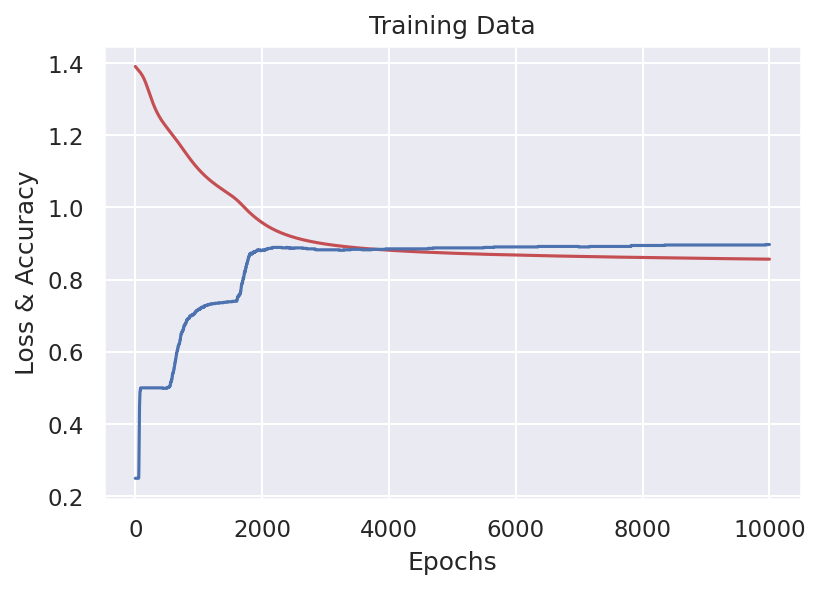

Accuracy: 0.8973333239555359
Loss: 0.8567402362823486


In [ ]:
fn = FFNetwork()
fit()

#We define fn here and call the fit function for training 

In [ ]:
class FFNetwork_v1(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.lin1 = nn.Linear(2,2)
    self.lin2 = nn.Linear(2,4)

  def forward(self,x):
    a1 = self.lin1(x.float())
    h1 = torch.sigmoid(a1)
    a2 = self.lin2(h1)
    h2 = torch.div(torch.exp(a2),torch.sum(torch.exp(a2),axis=1).view(-1,1))
    return h2
  
def fit_2(epochs = 10000, lr = 0.1):
  loss_count1 = []
  accuracy_count1 = []

  for i in tqdm_notebook(range(epochs)):
    y_hat = fn(X_train.float())
    loss_train = F.cross_entropy(y_hat,Y_train)
    loss_count1.append(loss_train)
    accuracy_count1.append(accuracy_find_2(y_hat,Y_train))
    loss_train.backward()
    with torch.no_grad():
      for param in fn.parameters():
        param -= (lr*param.grad)
      fn.zero_grad()
  
  plt.figure(dpi=150)
  plt.plot(loss_count1,'r')
  plt.plot(accuracy_count1,'b')
  plt.xlabel('Epochs')
  plt.ylabel('Loss & Accuracy')
  plt.title('Training Data')
  plt.show()
  print('Accuracy:', accuracy_count1[epochs-1])
  print('Loss:', loss_count1[epochs-1].item())


def accuracy_find_2(y_hat,y):
  return (torch.argmax(y_hat,axis=1) == y).float().mean().item()



#We define another class here, initialization is not done with nn.parameter, we use nn.linear
#We can avoid the matrix multiplication here by using linear, we just pass X_train into it
#We run the training loop, mostly the same, parameter method can still be used for updating 
#The optimization and plotting remains the same as before 

#The major change from earlier is in the dimension of the matrices used
#Linear is initialized as 2,2 and 2,4 instead of 2,2 and 4,2
#X is not transposed, matrix multiplied with w as (x,w) instead of (w,x) --> (750,2)x(2,2) and (750,2)x(2,4)
#While doing softmax manually, care is taken to divide the sum along each row, torch.div is used here with modification
#Accuracy count function is also modified and argmax is taken along colums (axis = 1) rather than rows (axis=0)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


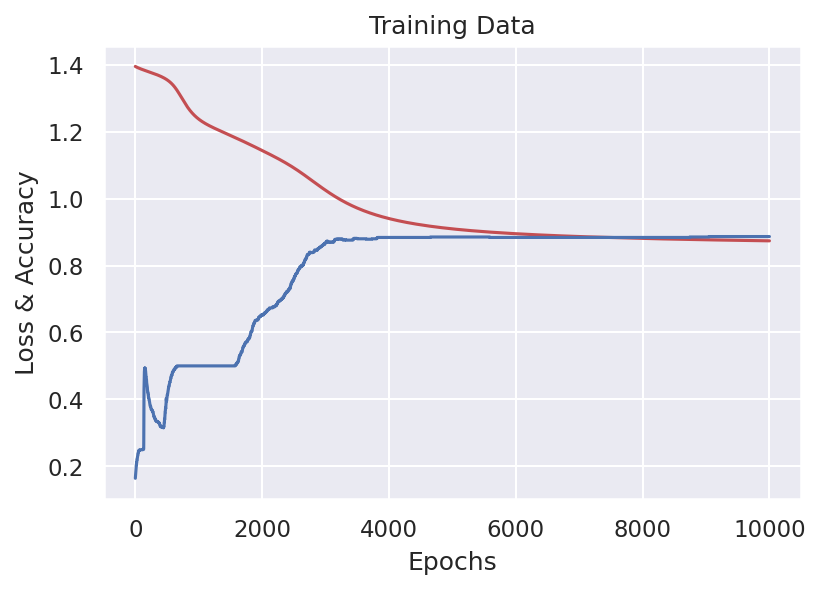

Accuracy: 0.8866666555404663
Loss: 0.8738743662834167


In [ ]:
fn = FFNetwork_v1()
fit_2()

In [ ]:
def fit_3(epochs=10000,lr=0.1):
  loss_count2 = []
  accuracy_count2 = []
  opt = optim.SGD(fn.parameters(),lr=0.1)

  for i in tqdm_notebook(range(epochs)):
    y_hat = fn(X_train.float())
    loss_train = F.cross_entropy(y_hat,Y_train)
    loss_count2.append(loss_train)
    accuracy_count2.append(accuracy_find_2(y_hat,Y_train))
    loss_train.backward()
    opt.step()
    opt.zero_grad()


  plt.figure(dpi=150)
  plt.plot(loss_count2,'r')
  plt.plot(accuracy_count2,'b')
  plt.xlabel('Epochs')
  plt.ylabel('Loss & Accuracy')
  plt.title('Training Data')
  plt.show()
  print('Accuracy:', accuracy_count2[epochs-1])
  print('Loss:', loss_count2[epochs-1].item())


#This is the almost the same fit function as used before
#Only change is that now we don't need to cal the loop on params also for updating, we can use optim
#We initialise opt above with fn.parameters and learning rate and simply call opt.step() for updating and opt.zero_grad for setting gradients to 0

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  


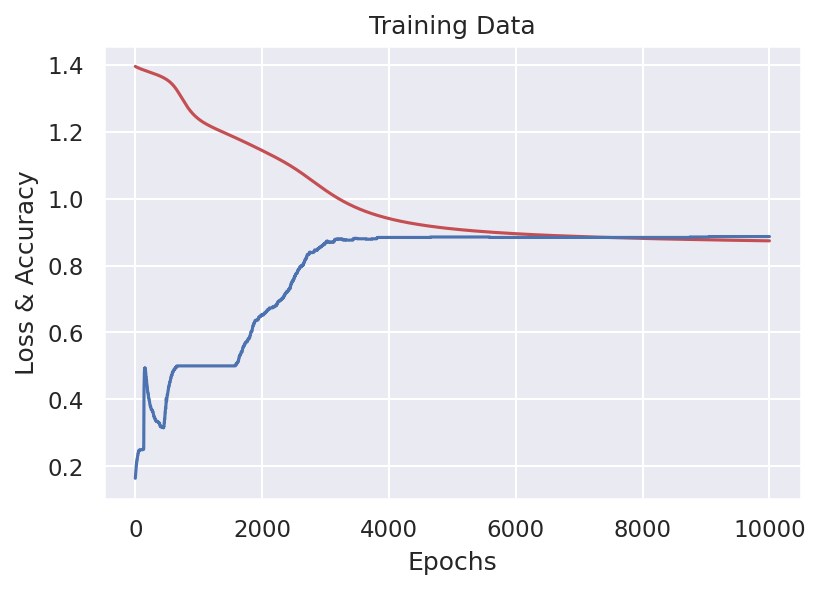

Accuracy: 0.8866666555404663
Loss: 0.8738743662834167


In [ ]:
fn = FFNetwork_v1()
fit_3()

In [ ]:
class FFNetwork_v2(nn.Module):

  def __init__(self):
    super().__init__()
    torch.manual_seed(0)
    self.net = nn.Sequential(
        nn.Linear(2,4),
        nn.Sigmoid(),
        nn.Linear(4,8),
        nn.Linear(8,4),
        nn.Softmax()
        )
    

  def weights_init(self,m):
    if isinstance(m, nn.Linear):
      nn.init.kaiming_uniform_(m.weight,nonlinearity='sigmoid')
      nn.init.zeros_(m.bias)
  
  
  
  def forward(self,x): 
    return self.net(x)


def fit_4(x,y,model,loss_fn,opt,epochs=4000,show_plots=False):
  
  loss_count = []
  accuracy_count = []
  for i in tqdm_notebook(range(epochs)):
    loss_train = loss_func(model(x.float()),y)
    loss_count.append(loss_train.item())
    accuracy_count.append(accuracy_find_2(model(x.float()),y))
    loss_train.backward()
    opt.step()
    opt.zero_grad()
  if show_plots == True:
    plt.figure(dpi=150)
    plt.plot(loss_count,'r')
    plt.plot(accuracy_count,'b')
    plt.xlabel('Epochs')
    plt.ylabel('Loss & Accuracy')
    plt.title('Training Data')
    plt.show()
    print('Accuracy:', accuracy_count[epochs-1])
    print('Loss:', loss_count[epochs-1])


#This the our cleanest class written so far, we have abstracted out as much as we could 
#The forward pass code can also be replaced using nn.Sequential which takes care of initialising and forward pass together
#In our new fit function we give x,y class, loss function, optimizer and epochs as input and remove code for plotting
#Only the final loss value is returned/modified to show the plots also 
#We need to support different initilisation methods, so we have written another function called weights init
#This checks nn.sequential and for each linear command, applies the specified init method
#This cannot be called here or in the fit function, it is called separately while instantiating the class

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:30: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`


/usr/local/lib/python3.7/dist-packages/torch/nn/modules/container.py:119: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


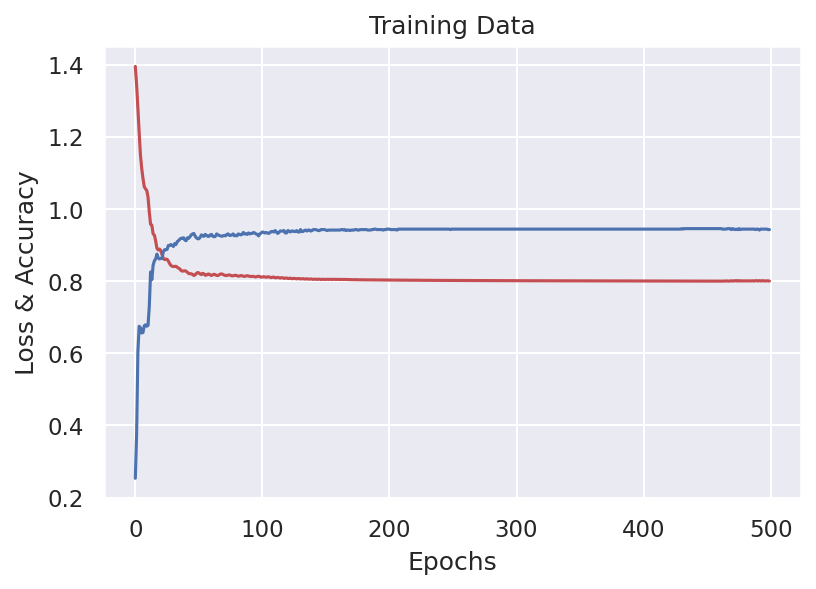

Accuracy: 0.9426666498184204
Loss: 0.8001279234886169
CPU times: user 1.64 s, sys: 24.3 ms, total: 1.66 s
Wall time: 1.68 s


In [ ]:
%%time
device = torch.device("cpu")
X_train = X_train.to(device)
Y_train = Y_train.to(device)
fn = FFNetwork_v2()
fn.net.apply(fn.weights_init)
fn.to(device)
opt = optim.Adam(fn.parameters(),lr=0.12, betas=(0.97, 0.99), eps=1e-08)
loss_func = F.cross_entropy
fit_4(X_train,Y_train,fn,loss_func,opt,epochs=500,show_plots=True)

#We instantiate the class, set our optimizer and define the loss function
#We then call the fit function with the appropriate inputs as discussed above
#Everything is moved to cpu/cuda depending on what we specify
#We can also use different optimizers by replacing the single optim line of code we have written above

#The most efficient use of cuda/GPU is when our network is very large, time taken will be orders of mangnitude lower
#For smaller networks the change is not very evident, performance may also be the same 